In [2]:
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data in a DataFrame using Pandas

In [3]:
df = pd.read_excel(r"C:\Users\ayanm\Desktop\My Projects\TTC Bus Delays\ttc-bus-delay-data-2023\original_data.xlsx")

### Printing the first 5 rows of the data

In [4]:
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


### Checking the Shape of the data. 

In [5]:
df.shape

(50913, 10)

### Checking for any Null Values in the data

In [6]:
df.isnull().sum()

Date            0
Route         528
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    8775
Vehicle         0
dtype: int64

### As we can see there are 528 records which do not have the bus route number and 8775 records without the travel direction. 
### For this analysis purpose, I will drop the 528 records which have no route number because some of these are special services which do not operate regularly. 
### As for the 8775 records without travel direction, I will assign the direction as 'Not Specified' and won't drop these records.

### Assigning 'Not Specified' as the travel direction for the 8775 records.

In [7]:
df['Direction'] = df['Direction'].fillna('Not Specified')

In [8]:
df.isnull().sum()

Date           0
Route        528
Time           0
Day            0
Location       0
Incident       0
Min Delay      0
Min Gap        0
Direction      0
Vehicle        0
dtype: int64

### Dropping the 528 records with no bus route number.

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Date         0
Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Direction    0
Vehicle      0
dtype: int64

In [11]:
df.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,Not Specified,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,Not Specified,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,Not Specified,1559


### Checking the datatypes of the columns and converting it into appropriate types.

In [12]:
print(df.dtypes)

Date         datetime64[ns]
Route                object
Time                 object
Day                  object
Location             object
Incident             object
Min Delay             int64
Min Gap               int64
Direction            object
Vehicle               int64
dtype: object


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [14]:
df['Vehicle'] = df['Vehicle'].astype('object')

In [15]:
categorical_columns = ['Route', 'Day', 'Location', 'Incident', 'Direction']
df[categorical_columns] = df[categorical_columns].astype('category')

In [16]:
print(df.dtypes)

Date         datetime64[ns]
Route              category
Time                 object
Day                category
Location           category
Incident           category
Min Delay             int64
Min Gap               int64
Direction          category
Vehicle              object
dtype: object


### Checking for duplicate values and removing them if any exists

In [17]:
df.duplicated().sum()

187

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
print(df.describe())

          Min Delay       Min Gap
count  50198.000000  50198.000000
mean      20.651819     33.406191
std       51.561643     53.658697
min        0.000000      0.000000
25%        9.000000     17.000000
50%       11.000000     22.000000
75%       20.000000     40.000000
max      998.000000    992.000000


In [21]:
print(df.describe(include=['object']))

            Time  Vehicle
count      50198    50198
unique      1440     2314
top     16:00:00        0
freq         103     1933


## EDA

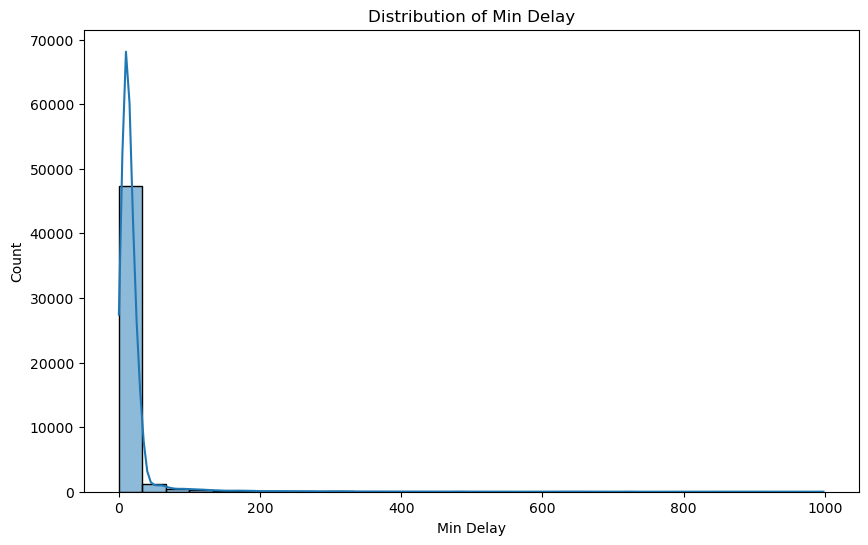

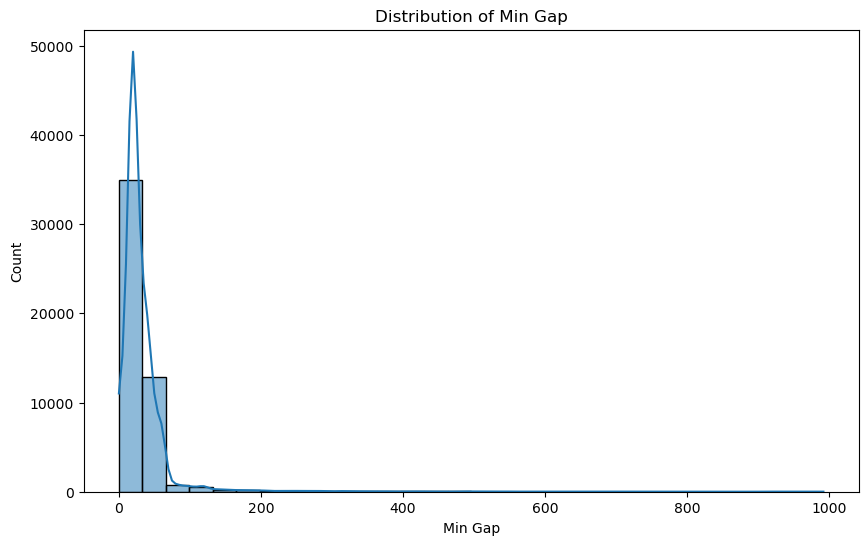

In [22]:
# Histogram for 'Min Delay'
plt.figure(figsize=(10,6))
sns.histplot(df['Min Delay'], bins=30, kde=True)
plt.title('Distribution of Min Delay')
plt.show()

# Histogram for 'Min Gap'
plt.figure(figsize=(10,6))
sns.histplot(df['Min Gap'], bins=30, kde=True)
plt.title('Distribution of Min Gap')
plt.show()

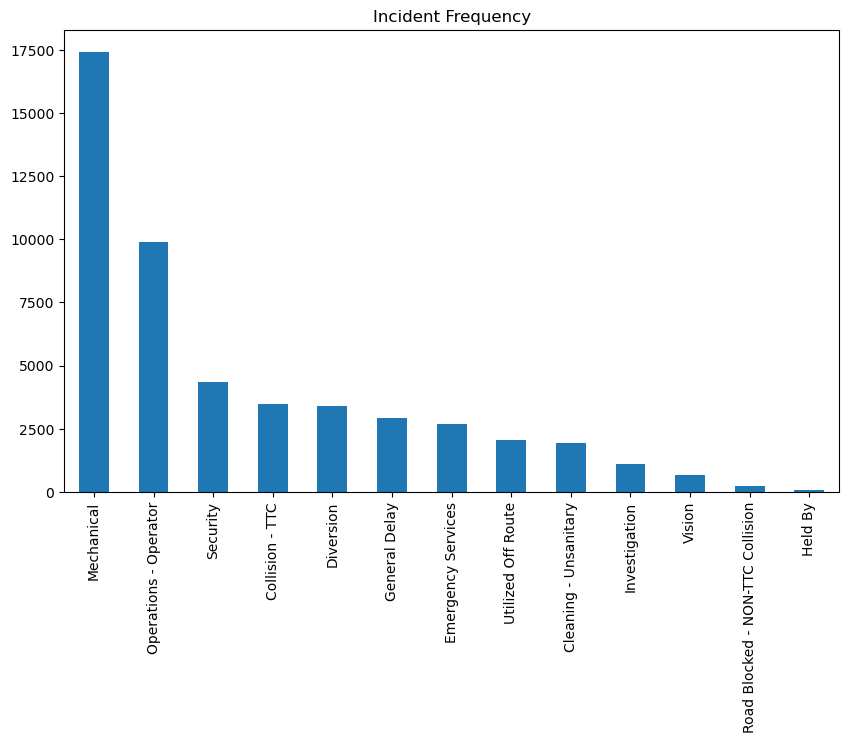

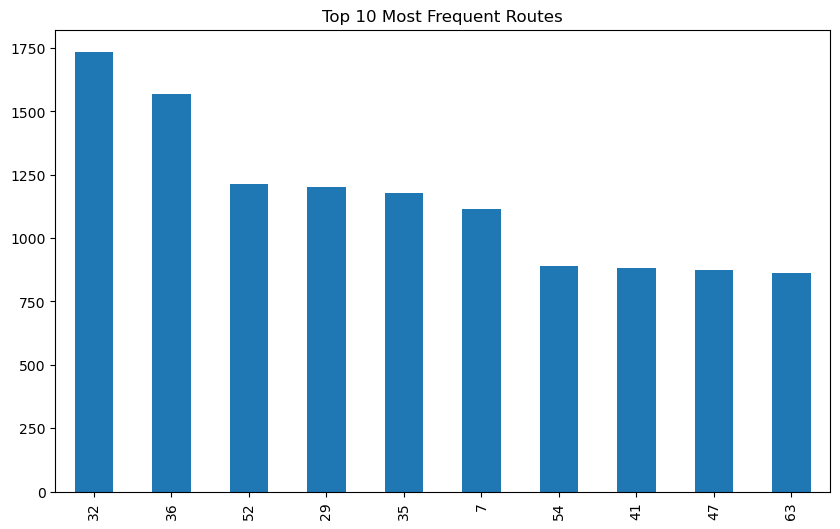

In [23]:
# Frequency of incidents
plt.figure(figsize=(10,6))
df['Incident'].value_counts().plot(kind='bar')
plt.title('Incident Frequency')
plt.show()

# Frequency of routes
plt.figure(figsize=(10,6))
df['Route'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Routes')
plt.show()

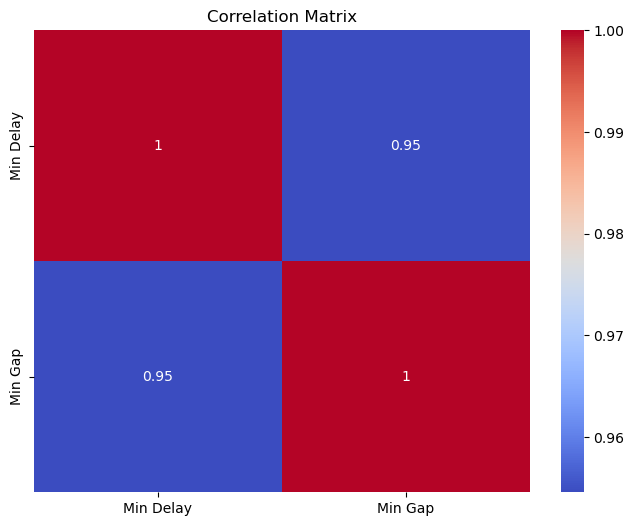

In [24]:
# Correlation matrix
corr_matrix = df[['Min Delay', 'Min Gap']].corr()

# Heatmap for correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

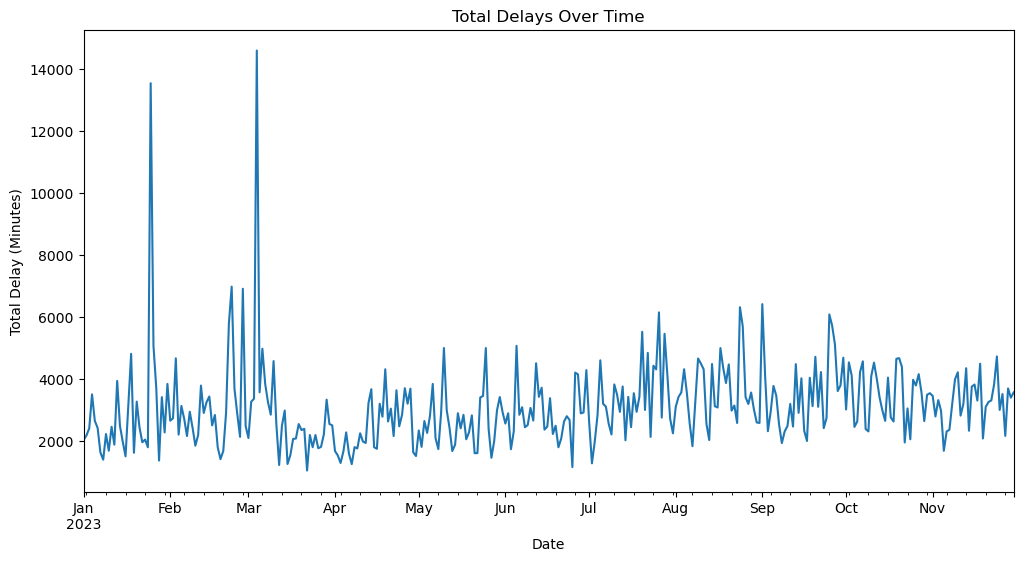

In [25]:
# Delays over time
df['Date'] = pd.to_datetime(df['Date'])
daily_delays = df.groupby('Date')['Min Delay'].sum()

plt.figure(figsize=(12,6))
daily_delays.plot()
plt.title('Total Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Total Delay (Minutes)')
plt.show()

Incident   Cleaning - Unsanitary  Collision - TTC  Diversion  \
Day                                                            
Friday                       287              607        581   
Monday                       235              506        483   
Saturday                     283              402        446   
Sunday                       256              278        410   
Thursday                     295              585        512   
Tuesday                      298              546        466   
Wednesday                    277              559        503   

Incident   Emergency Services  General Delay  Held By  Investigation  \
Day                                                                    
Friday                    380            330        9            162   
Monday                    354            288        7            143   
Saturday                  383            468       22            158   
Sunday                    365            334       13          

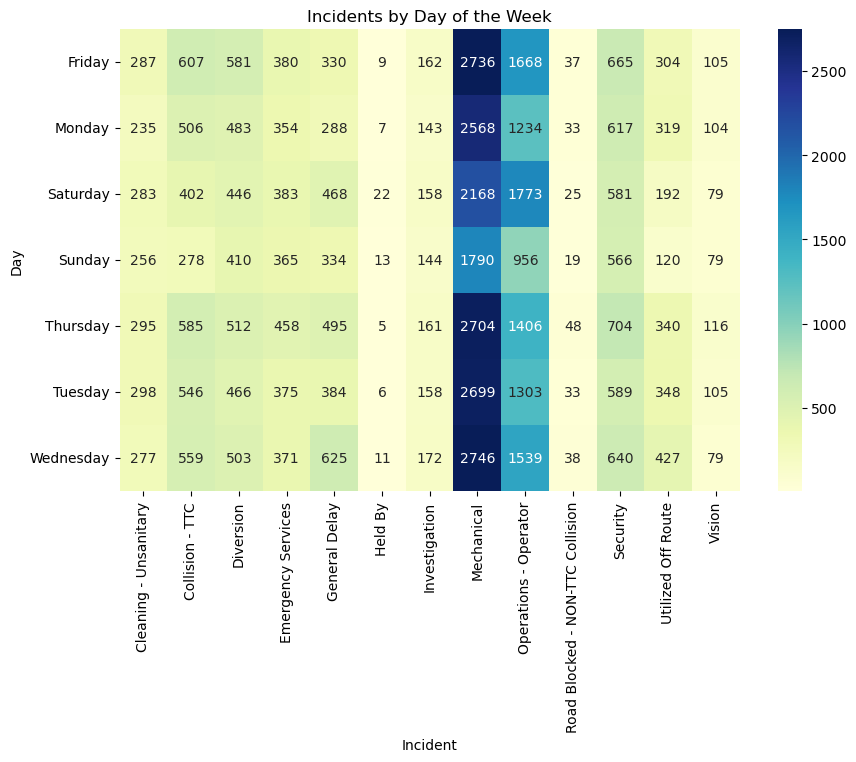

In [26]:
# Crosstab of incidents by day of the week
incident_by_day = pd.crosstab(df['Day'], df['Incident'])
print(incident_by_day)

# Heatmap for incidents by day of the week
plt.figure(figsize=(10,6))
sns.heatmap(incident_by_day, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Incidents by Day of the Week')
plt.show()

In [27]:
file_path = r'C:\Users\ayanm\Desktop\My Projects\TTC Bus Delays\ttc-bus-delay-data-2023\final_data.csv'

In [29]:
df.to_csv(file_path, index=False)